# Logistic regression
## 1. Download data from https://science.sciencemag.org/content/359/6378/926 (supplementary materials).

read the abstract of the article to get familiar with data origin
open the data in excel and get familiar with its content
load the protein level data (you need to figure out which one is that) as a pandas dataframe
handle missing values and convert features to numeric values when it is needed
get rid of the unnecessary (which does not encode protein levels or the tumor type) columns and the CancerSEEK results


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel( "data/aar3247_cohen_sm_tables-s1-s11.xlsx",engine='openpyxl',sheet_name='Table S6',skiprows=2)
df

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,PAPA 1357,PAPA 1357 PLS 1,Ovary,III,*879.498,3546.43,1493.32,1428.31,**836.85,37.9,...,*207.24,72.22,3967.55,4045.18,*16.89,12877.1,88464.04,47219.24,1.000000,Positive
1817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,*Protein concentration below the limit of dete...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,**Protein concentration above the limit of det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.loc[df.index < 1817]
df

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA 1353,PAPA 1353 PLS 1,Ovary,I,*879.498,1484.7,2096.76,24.82,10.3,42.39,...,*207.24,115.24,5390.31,8538.58,*16.89,*599.4,167799.61,50128.60,0.980312,Positive
1813,PAPA 1354,PAPA 1354 PLS 1,Ovary,I,1337.33,1607.9,852.37,5.58,9.8,*16.44,...,*207.24,147.17,7951.03,12966.19,*16.89,*599.4,123443.76,54066.98,0.999995,Positive
1814,PAPA 1355,PAPA 1355 PLS 1,Ovary,III,*879.498,1592.84,1044.45,30.48,8.48,*16.44,...,*207.24,104.63,2396.36,1901.41,*16.89,*599.4,104070.89,39844.02,1.000000,Positive
1815,PAPA 1356,PAPA 1356 PLS 1,Ovary,II,*879.498,5267.95,1445.69,1469.45,23.74,62.26,...,*207.24,73.55,3079.81,5312.90,*16.89,6864.33,110579.24,42921.13,1.000000,Positive


In [4]:
df.isna().sum()

Patient ID #                              0
Sample ID #                               0
Tumor type                                0
AJCC Stage                              812
AFP (pg/ml)                               0
Angiopoietin-2 (pg/ml)                    0
AXL (pg/ml)                               6
CA-125 (U/ml)                             0
CA 15-3 (U/ml)                            0
CA19-9 (U/ml)                             0
CD44 (ng/ml)                              6
CEA (pg/ml)                               0
CYFRA 21-1 (pg/ml)                        0
DKK1 (ng/ml)                              0
Endoglin (pg/ml)                          0
FGF2 (pg/ml)                              0
Follistatin (pg/ml)                       0
Galectin-3 (ng/ml)                        0
G-CSF (pg/ml)                             7
GDF15 (ng/ml)                             0
HE4 (pg/ml)                               0
HGF (pg/ml)                               0
IL-6 (pg/ml)                    

In [5]:
cancerseek = df[['Tumor type','CancerSEEK Test Result','CancerSEEK Logistic Regression Score']]
df = df.drop(columns=['CancerSEEK Test Result','CancerSEEK Logistic Regression Score','Sample ID #','Patient ID #','AJCC Stage'])
df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82
1,Colorectum,*715.308,20936.35,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,...,14374.99,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,...,12072.51,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,...,23718.17,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,*879.498,1484.7,2096.76,24.82,10.3,42.39,14.92,914,*1970.916,...,58266.97,2542.26,*207.24,115.24,5390.31,8538.58,*16.89,*599.4,167799.61,50128.60
1813,Ovary,1337.33,1607.9,852.37,5.58,9.8,*16.44,12.32,1179.51,*1970.916,...,187828.79,1670.22,*207.24,147.17,7951.03,12966.19,*16.89,*599.4,123443.76,54066.98
1814,Ovary,*879.498,1592.84,1044.45,30.48,8.48,*16.44,8.26,*443.01,3589.73,...,241440.02,1194.03,*207.24,104.63,2396.36,1901.41,*16.89,*599.4,104070.89,39844.02
1815,Ovary,*879.498,5267.95,1445.69,1469.45,23.74,62.26,16.53,*443.01,50659.05,...,140145.7,1607.16,*207.24,73.55,3079.81,5312.90,*16.89,6864.33,110579.24,42921.13


In [6]:
df = df.dropna()
df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82
1,Colorectum,*715.308,20936.35,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,...,14374.99,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,...,12072.51,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,...,23718.17,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,*879.498,1484.7,2096.76,24.82,10.3,42.39,14.92,914,*1970.916,...,58266.97,2542.26,*207.24,115.24,5390.31,8538.58,*16.89,*599.4,167799.61,50128.60
1813,Ovary,1337.33,1607.9,852.37,5.58,9.8,*16.44,12.32,1179.51,*1970.916,...,187828.79,1670.22,*207.24,147.17,7951.03,12966.19,*16.89,*599.4,123443.76,54066.98
1814,Ovary,*879.498,1592.84,1044.45,30.48,8.48,*16.44,8.26,*443.01,3589.73,...,241440.02,1194.03,*207.24,104.63,2396.36,1901.41,*16.89,*599.4,104070.89,39844.02
1815,Ovary,*879.498,5267.95,1445.69,1469.45,23.74,62.26,16.53,*443.01,50659.05,...,140145.7,1607.16,*207.24,73.55,3079.81,5312.90,*16.89,6864.33,110579.24,42921.13


In [7]:
for i in df:
    if i == 'Tumor type':
        continue
    df[i] = df[i].astype(str)
    df[i] = df[i].map(lambda x: x.lstrip('*'))
    df[i] = df[i].astype(float)

alltypedf = df.copy()
df

C:\Users\deuts\AppData\Local\Temp\ipykernel_8344\1908727145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(str)
C:\Users\deuts\AppData\Local\Temp\ipykernel_8344\1908727145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map(lambda x: x.lstrip('*'))
C:\Users\deuts\AppData\Local\Temp\ipykernel_8344\1908727145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,...,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60
1813,Ovary,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,...,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98
1814,Ovary,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3589.730,...,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02
1815,Ovary,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,...,140145.70,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13


In [8]:
df.loc[df["Tumor type"] != "Normal","Tumor type"] = 1
df.loc[df["Tumor type"] == "Normal","Tumor type"] = -1
df["Tumor type"] = df["Tumor type"].astype(int)
df

C:\Users\deuts\AppData\Local\Temp\ipykernel_8344\1741624952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tumor type"] = df["Tumor type"].astype(int)


,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,1,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,1,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,1,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,1,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,1,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,...,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60
1813,1,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,...,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98
1814,1,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3589.730,...,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02
1815,1,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,...,140145.70,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13


# 2. Predict if a sample is cancerous or not
your need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
train a logistic regression (sklearn API) on every second sample (not first 50% of the data (!), use every second line)
generate prediction for the samples that were not used during the training

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
def getting_train_val(dataframe, interval=2):
    train = dataframe[::interval]
    test = dataframe[~dataframe.index.isin(dataframe[::interval].index)].dropna()
    return train, test

In [11]:
X_train, X_test = getting_train_val(df.drop(columns=['Tumor type']))
y_train, y_test = getting_train_val(df[['Tumor type']])

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
y_train

,Tumor type
0,1
2,1
4,1
6,1
8,1
...,...
1808,1
1810,1
1812,1
1814,1


In [14]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train["Tumor type"])
y_predict = LogReg.predict(X_test)
y_predict_logistic = LogReg.decision_function(X_test)

In [15]:
y_predict

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1

In [16]:
y_test

,Tumor type
1,1
3,1
5,1
7,1
9,1
...,...
1807,1
1809,1
1811,1
1813,1


3. Comparision to CancerSEEK
plot the ROC curve and calculate the confusion matrix for the predictions
do the same for the CancerSEEK predictions
compare your model's performance to CancerSEEK performance

###  confusion matrix

In [17]:
plot_dict = {x:{y:0 for y in set(y_test['Tumor type'])} for x in set(y_test['Tumor type'])}
print(plot_dict)
for index,value in enumerate(y_test['Tumor type']):
    plot_dict[value][y_predict[index]] += 1

plot_dict = {x:[y for y in y.values()] for x,y in plot_dict.items()}
print(plot_dict)
plotdf = pd.DataFrame.from_dict(plot_dict)
plotdf.index= plot_dict.keys()
plotdf

{1: {1: 0, -1: 0}, -1: {1: 0, -1: 0}}
{1: [418, 84], -1: [44, 355]}


,1,-1
1,418,44
-1,84,355


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

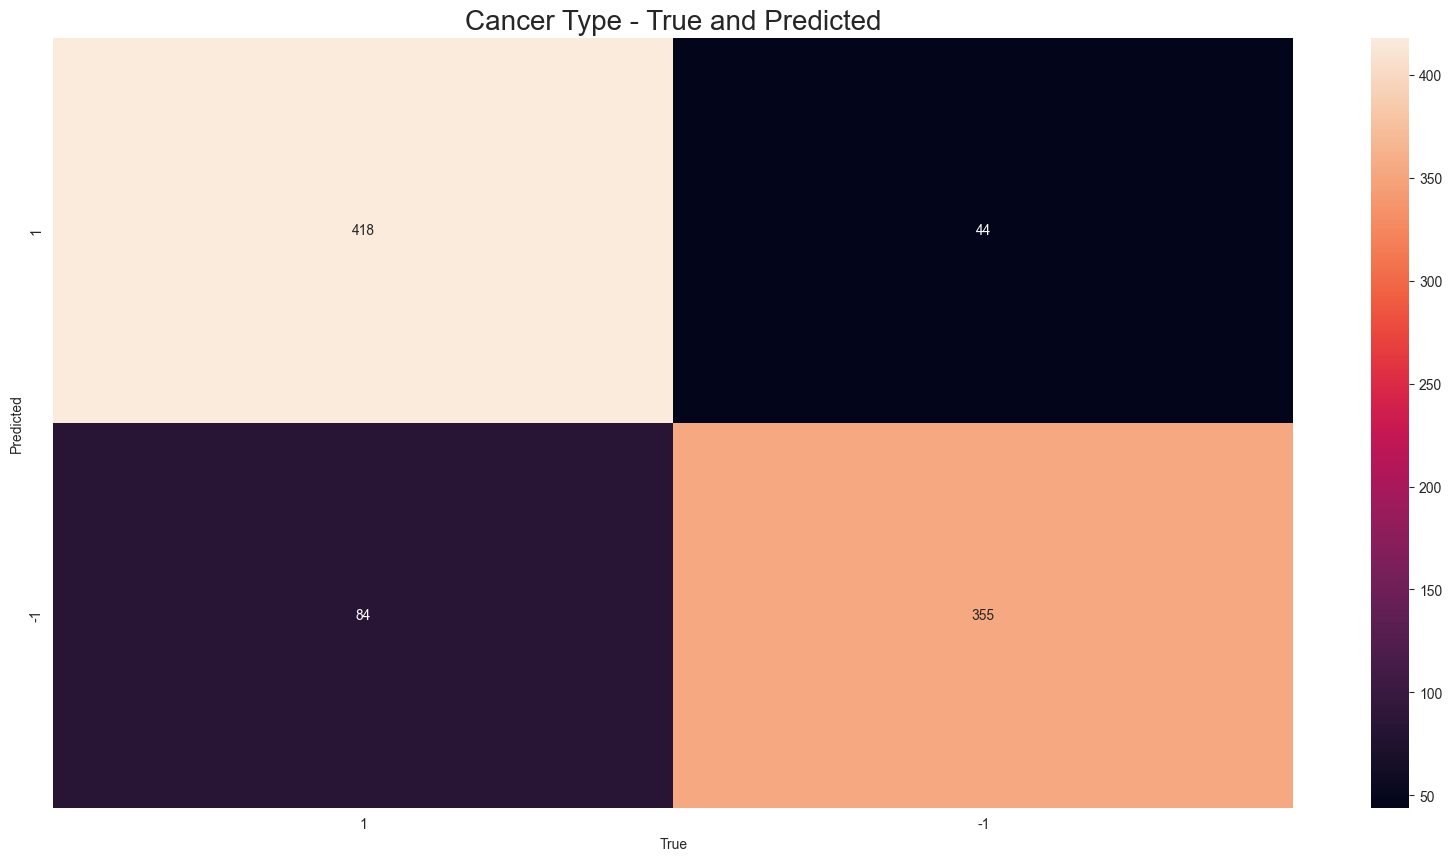

In [19]:
plt.figure(figsize = (20,10))
sns.heatmap(plotdf, annot=True,fmt='g')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Cancer Type - True and Predicted", fontsize=20)
plt.show()

## SVM classifier

In [20]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

C:\programing\python_program_for_biologist\Data_mining_and_machine_learning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


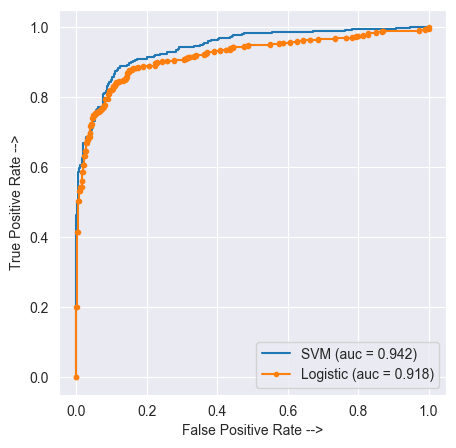

In [21]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_predict_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### CancerSEEK

In [22]:
cancerseek.loc[cancerseek["Tumor type"] != "Normal","Tumor type"] = 1
cancerseek.loc[cancerseek["Tumor type"] == "Normal","Tumor type"] = -1
cancerseek.loc[cancerseek["CancerSEEK Test Result"] == "Positive","CancerSEEK Test Result"] = 1
cancerseek.loc[cancerseek["CancerSEEK Test Result"] == "Negative","CancerSEEK Test Result"] = -1
cancerseek = cancerseek.dropna()
cancerseek["Tumor type"] = cancerseek["Tumor type"].astype(int)

cancerseek

,Tumor type,CancerSEEK Test Result,CancerSEEK Logistic Regression Score
0,1,1,0.938342
1,1,1,0.925363
2,1,-1,0.852367
3,1,-1,0.617639
4,1,-1,0.318434
...,...,...,...
1812,1,1,0.980312
1813,1,1,0.999995
1814,1,1,1.000000
1815,1,1,1.000000


In [23]:
cancerseek_fpr, cancerseek_tpr, threshold = roc_curve(cancerseek["Tumor type"], cancerseek["CancerSEEK Logistic Regression Score"])
auc_cancerseek = auc(cancerseek_fpr, cancerseek_tpr)

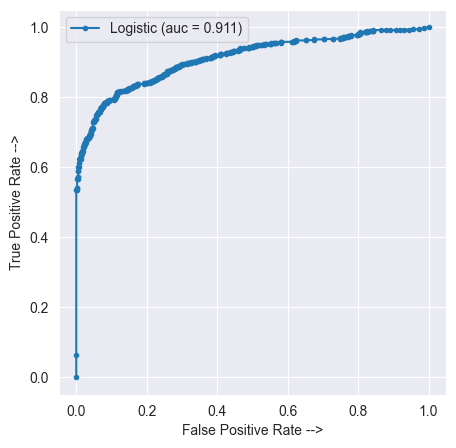

In [24]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(cancerseek_fpr, cancerseek_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_cancerseek)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [25]:
plot_dict = {x:{y:0 for y in set(cancerseek['Tumor type'])} for x in set(cancerseek['Tumor type'])}
print(plot_dict)
results = cancerseek["CancerSEEK Test Result"].tolist()
for index,value in enumerate(cancerseek['Tumor type']):
    plot_dict[value][results[index]] += 1

plot_dict = {x:[y for y in y.values()] for x,y in plot_dict.items()}
print(plot_dict)
plotdf = pd.DataFrame.from_dict(plot_dict)
plotdf.index= plot_dict.keys()
plotdf

{1: {1: 0, -1: 0}, -1: {1: 0, -1: 0}}
{1: [626, 379], -1: [7, 805]}


,1,-1
1,626,7
-1,379,805


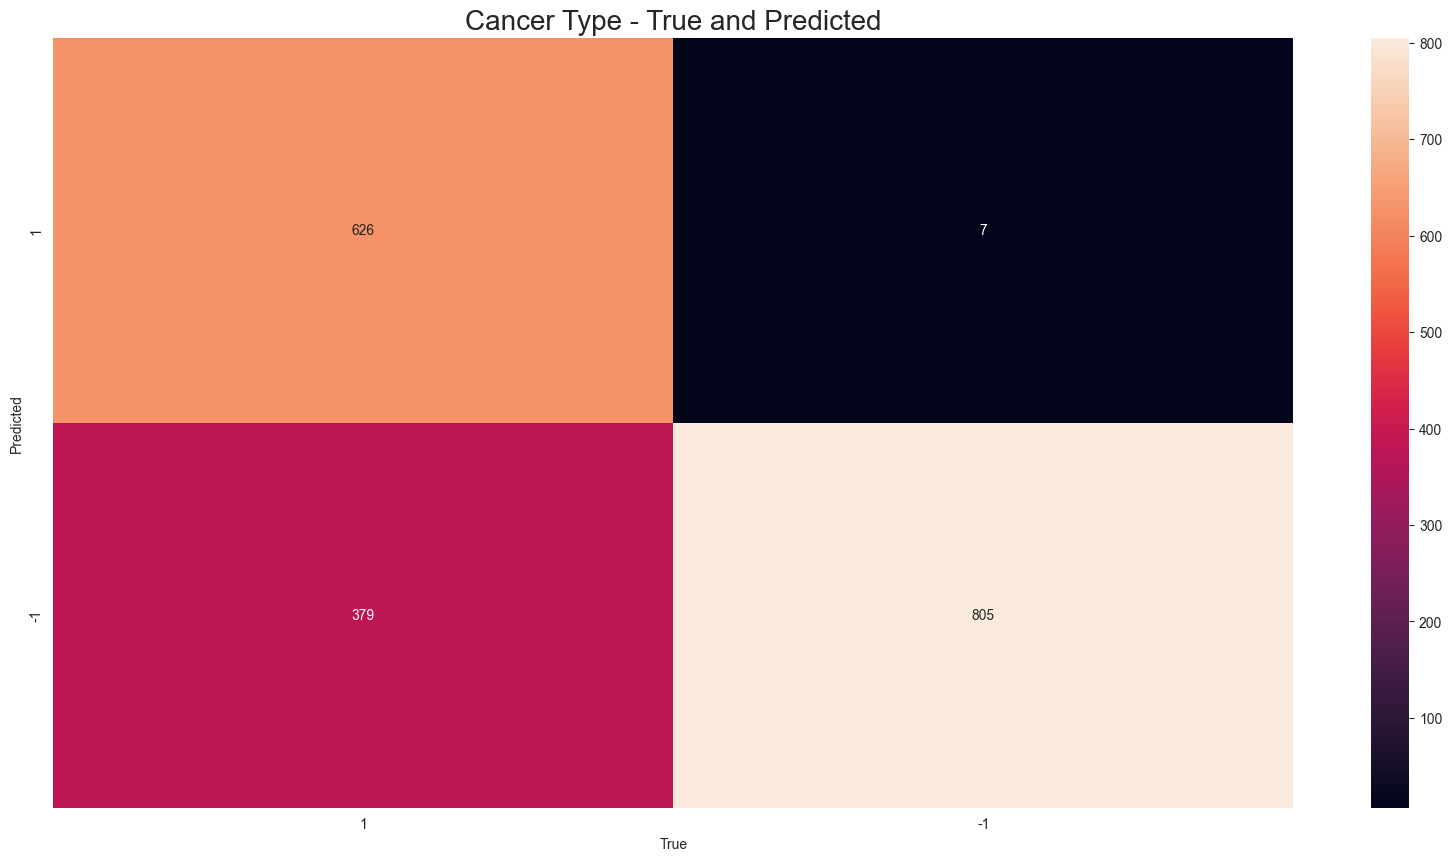

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(plotdf, annot=True,fmt='g')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Cancer Type - True and Predicted", fontsize=20)
plt.show()

# 4. Hepatocellular carcinoma
fit a logistic regression (using statsmodels API this time) to predict if a sample has Hepatocellular carcinoma (liver cancer) or not. You need to keep only the liver and the normal samples for this exercise! For fitting use only the first 25 features and all the rows (which are liver or normal)
select the 5 best predictor based on P values.
Write down the most important features (based on P value) and compare them to the tumor markers that you find on wikipeida https://en.wikipedia.org/wiki/Hepatocellular_carcinoma or other sources!

In [27]:
hepatocellular =  alltypedf[(alltypedf["Tumor type"] == "Normal") | (alltypedf["Tumor type"] == "Liver")]
hepatocellular

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
145,Liver,7843.860,1644.30,2868.99,9.570,12.85,41.970,21.06,3104.410,4152.370,...,27997.96,726.77,2401.380,39.32,6060.80,6372.83,16.152,7945.950,150551.59,38711.14
146,Liver,2030.920,852.82,762.79,4.896,21.49,26.390,13.78,1783.260,5189.040,...,25363.17,743.16,1180.960,207.34,4975.76,4698.34,16.152,10282.100,48099.87,24840.11
147,Liver,959.916,4155.29,1302.39,4.896,22.27,16.134,11.76,1552.650,1918.914,...,28690.22,2410.89,421.210,10.83,5612.85,5825.51,16.152,25272.120,102897.67,26922.04
148,Liver,7417.290,937.12,7194.25,4.770,5.79,15.798,17.12,978.050,6202.710,...,36139.02,668.66,202.158,107.28,6935.33,5218.19,16.104,2229.275,76849.55,67225.11
188,Liver,600608.892,2242.08,1047.07,6.290,9.58,50.350,8.98,1530.860,6047.910,...,66871.31,293.12,2054.750,42.17,4546.75,6383.08,16.770,2173.560,63685.39,24648.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Normal,740.016,1683.29,2151.58,4.608,4.93,15.912,25.39,768.680,1816.458,...,8378.74,2989.40,1237.140,60.85,5139.90,5071.28,15.258,835.000,59951.49,44169.16
1699,Normal,740.016,802.16,1069.51,4.608,31.17,15.912,13.73,441.264,2320.110,...,4574.35,1779.41,1237.140,24.30,4050.87,3317.55,15.258,1370.010,59816.96,40469.19
1700,Normal,740.016,1112.37,1606.96,4.608,21.21,15.912,25.10,638.700,1816.458,...,20262.01,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.000,59579.84,40979.86
1701,Normal,740.016,583.62,1708.47,4.608,15.13,15.912,17.65,1264.430,1816.458,...,14147.17,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.000,67033.91,40559.19


In [28]:
hepatocellular = hepatocellular.dropna()
hepatocellular

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
145,Liver,7843.860,1644.30,2868.99,9.570,12.85,41.970,21.06,3104.410,4152.370,...,27997.96,726.77,2401.380,39.32,6060.80,6372.83,16.152,7945.950,150551.59,38711.14
146,Liver,2030.920,852.82,762.79,4.896,21.49,26.390,13.78,1783.260,5189.040,...,25363.17,743.16,1180.960,207.34,4975.76,4698.34,16.152,10282.100,48099.87,24840.11
147,Liver,959.916,4155.29,1302.39,4.896,22.27,16.134,11.76,1552.650,1918.914,...,28690.22,2410.89,421.210,10.83,5612.85,5825.51,16.152,25272.120,102897.67,26922.04
148,Liver,7417.290,937.12,7194.25,4.770,5.79,15.798,17.12,978.050,6202.710,...,36139.02,668.66,202.158,107.28,6935.33,5218.19,16.104,2229.275,76849.55,67225.11
188,Liver,600608.892,2242.08,1047.07,6.290,9.58,50.350,8.98,1530.860,6047.910,...,66871.31,293.12,2054.750,42.17,4546.75,6383.08,16.770,2173.560,63685.39,24648.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Normal,740.016,1683.29,2151.58,4.608,4.93,15.912,25.39,768.680,1816.458,...,8378.74,2989.40,1237.140,60.85,5139.90,5071.28,15.258,835.000,59951.49,44169.16
1699,Normal,740.016,802.16,1069.51,4.608,31.17,15.912,13.73,441.264,2320.110,...,4574.35,1779.41,1237.140,24.30,4050.87,3317.55,15.258,1370.010,59816.96,40469.19
1700,Normal,740.016,1112.37,1606.96,4.608,21.21,15.912,25.10,638.700,1816.458,...,20262.01,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.000,59579.84,40979.86
1701,Normal,740.016,583.62,1708.47,4.608,15.13,15.912,17.65,1264.430,1816.458,...,14147.17,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.000,67033.91,40559.19


In [29]:
import statsmodels.api as sm
import numpy as np

hepatocellular.loc[hepatocellular["Tumor type"] == "Normal","Tumor type"] = -1
hepatocellular.loc[hepatocellular["Tumor type"] == "Liver","Tumor type"] = 1

hepatocellular["Tumor type"] = hepatocellular["Tumor type"].astype(int)
hepatocellular

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
145,1,7843.860,1644.30,2868.99,9.570,12.85,41.970,21.06,3104.410,4152.370,...,27997.96,726.77,2401.380,39.32,6060.80,6372.83,16.152,7945.950,150551.59,38711.14
146,1,2030.920,852.82,762.79,4.896,21.49,26.390,13.78,1783.260,5189.040,...,25363.17,743.16,1180.960,207.34,4975.76,4698.34,16.152,10282.100,48099.87,24840.11
147,1,959.916,4155.29,1302.39,4.896,22.27,16.134,11.76,1552.650,1918.914,...,28690.22,2410.89,421.210,10.83,5612.85,5825.51,16.152,25272.120,102897.67,26922.04
148,1,7417.290,937.12,7194.25,4.770,5.79,15.798,17.12,978.050,6202.710,...,36139.02,668.66,202.158,107.28,6935.33,5218.19,16.104,2229.275,76849.55,67225.11
188,1,600608.892,2242.08,1047.07,6.290,9.58,50.350,8.98,1530.860,6047.910,...,66871.31,293.12,2054.750,42.17,4546.75,6383.08,16.770,2173.560,63685.39,24648.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,-1,740.016,1683.29,2151.58,4.608,4.93,15.912,25.39,768.680,1816.458,...,8378.74,2989.40,1237.140,60.85,5139.90,5071.28,15.258,835.000,59951.49,44169.16
1699,-1,740.016,802.16,1069.51,4.608,31.17,15.912,13.73,441.264,2320.110,...,4574.35,1779.41,1237.140,24.30,4050.87,3317.55,15.258,1370.010,59816.96,40469.19
1700,-1,740.016,1112.37,1606.96,4.608,21.21,15.912,25.10,638.700,1816.458,...,20262.01,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.000,59579.84,40979.86
1701,-1,740.016,583.62,1708.47,4.608,15.13,15.912,17.65,1264.430,1816.458,...,14147.17,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.000,67033.91,40559.19


In [30]:
X_train, X_test = getting_train_val(hepatocellular.iloc[:,1:25])
y_train, y_test = getting_train_val(hepatocellular[['Tumor type']])

In [31]:
log_reg = sm.Logit(y_train, X_train).fit()

ValueError: endog must be in the unit interval.

In [ ]:
hepatocellular.dtypes

## 5. Multiclass classification
Again, using every second datapoint train a logistic regression (sklearn API) to predict the tumor type. It is a multiclass classification problem.
Generate prediction for the rest of the dataset and show the confution matrix for the predictions!
Plot the ROC curves for the different cancer types on the same plot!
Intepret your results. Which cancer type can be predicted the most reliably?

In [ ]:
alltypedf

In [33]:
X_train, X_test = getting_train_val(alltypedf.drop(columns=['Tumor type']))
y_train, y_test = getting_train_val(alltypedf[['Tumor type']])

In [34]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [35]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train["Tumor type"])
y_predict = LogReg.predict(X_test)
y_predict_logistic = LogReg.decision_function(X_test)

In [36]:
###  confusion matrix
plot_dict = {x: {y: 0 for y in set(y_test['Tumor type'])} for x in set(y_test['Tumor type'])}
print(plot_dict)
for index, value in enumerate(y_test['Tumor type']):
    plot_dict[value][y_predict[index]] += 1

plot_dict = {x: [y for y in y.values()] for x, y in plot_dict.items()}
print(plot_dict)
plotdf = pd.DataFrame.from_dict(plot_dict)
plotdf.index = plot_dict.keys()
plotdf

{'Stomach': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Liver': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Ovary': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Lung': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Esophagus': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Breast': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Pancreas': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lung': 0, 'Esophagus': 0, 'Breast': 0, 'Pancreas': 0, 'Normal': 0, 'Colorectum': 0}, 'Normal': {'Stomach': 0, 'Liver': 0, 'Ovary': 0, 'Lu

,Stomach,Liver,Ovary,Lung,Esophagus,Breast,Pancreas,Normal,Colorectum
Stomach,2,3,2,0,1,0,0,1,11
Liver,0,8,0,0,1,2,0,0,1
Ovary,0,0,19,0,0,0,0,0,3
Lung,8,3,0,16,1,5,2,2,8
Esophagus,4,4,0,0,1,1,1,0,10
Breast,2,2,3,7,1,34,1,13,17
Pancreas,1,1,0,0,0,2,28,0,1
Normal,4,0,2,6,4,36,9,369,36
Colorectum,14,3,2,20,10,22,7,14,110


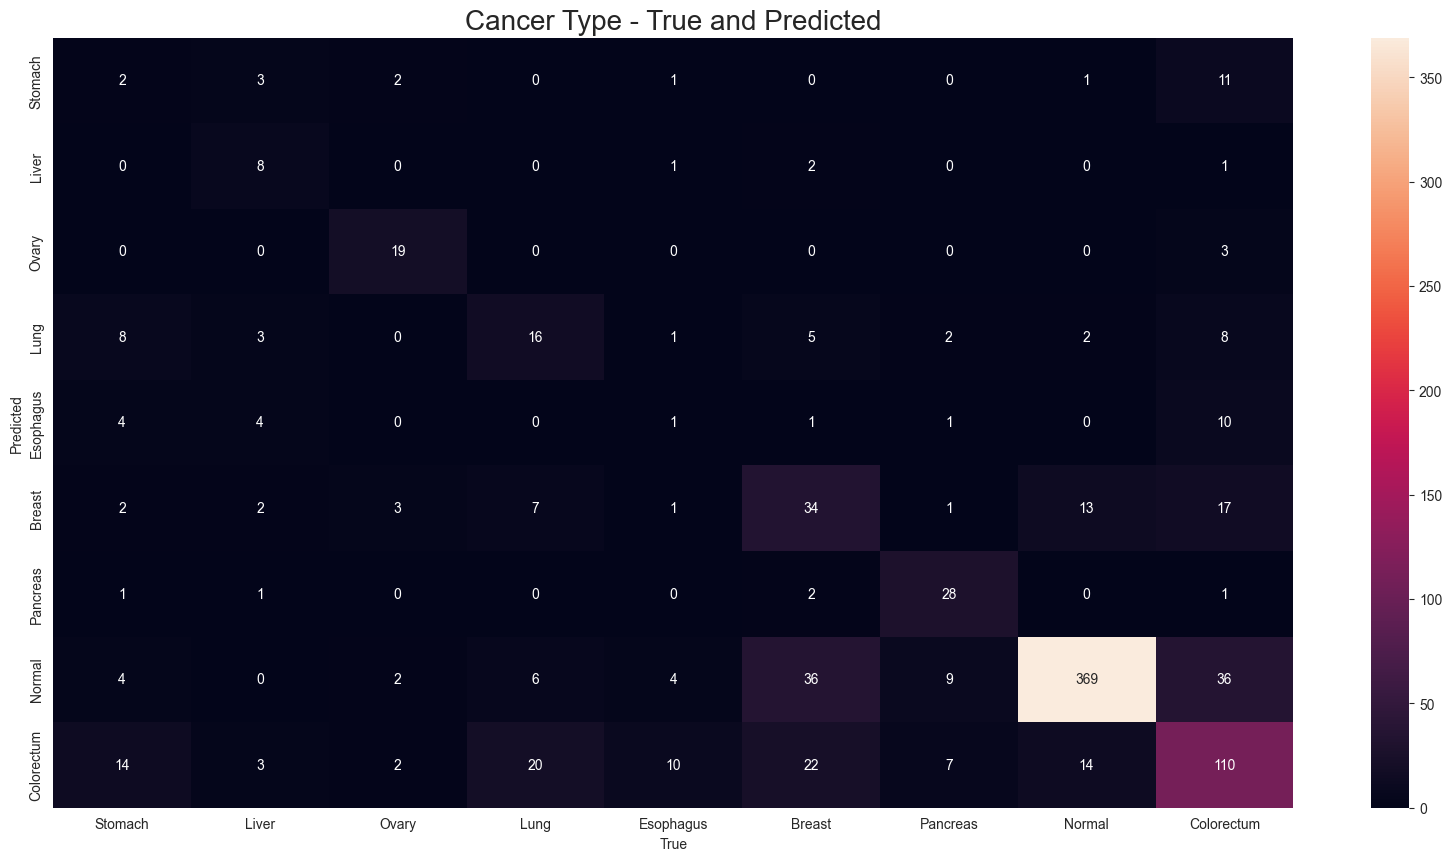

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(plotdf, annot=True, fmt='g')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Cancer Type - True and Predicted", fontsize=20)
plt.show()

In [38]:

y_predict_logistic = LogReg.decision_function(X_test)
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_predict_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

ValueError: multiclass format is not supported